In [47]:
import Pkg; Pkg.add("RData")
import Pkg; Pkg.add("CodecBzip2")
import Pkg; Pkg.add("DataStructures")
import Pkg; Pkg.add("NamedArrays")
import Pkg; Pkg.add("PrettyTables")
import Pkg; Pkg.add("PlotlyJS")
import Pkg; Pkg.add("StatsBase")
import Pkg; Pkg.add("HTTP")
import PKG; Pkg.add("Pyplot") 
import Pkg; Pkg.add("Plots")
import Pkg; Pkg.add("Random")

   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\J

LoadError: ArgumentError: Package PKG not found in current path:
- Run `import Pkg; Pkg.add("PKG")` to install the PKG package.


In [4]:
using CSV
using DataFrames
using StatsBase
using RData, LinearAlgebra, Random, Distributions, DataStructures, NamedArrays, PrettyTables,GLM, DataFrames, Statistics
import CodecBzip2

LoadError: ArgumentError: Package CSV not found in current path:
- Run `import Pkg; Pkg.add("CSV")` to install the CSV package.


In [8]:
using Pkg
Pkg.add("CSV")

   Resolving package versions...
   Installed WeakRefStrings ─ v1.4.2
   Installed FilePathsBase ── v0.9.18
   Installed SentinelArrays ─ v1.3.13
   Installed CSV ──────────── v0.10.4
    Updating `C:\Users\JJTF\.julia\environments\v1.7\Project.toml`
  [336ed68f] + CSV v0.10.4
    Updating `C:\Users\JJTF\.julia\environments\v1.7\Manifest.toml`
  [336ed68f] + CSV v0.10.4
  [48062228] + FilePathsBase v0.9.18
  [91c51154] + SentinelArrays v1.3.13
  [ea10d353] + WeakRefStrings v1.4.2
Precompiling project...
  ✓ FilePathsBase
  ✓ SentinelArrays
  ✓ WeakRefStrings
  ✓ CSV
  4 dependencies successfully precompiled in 7 seconds (120 already precompiled)


In [17]:
using HTTP, CSV
url = "https://raw.githubusercontent.com/JJTF/skills_assesstments/main/Data/wage2015_subsample_inference.csv" 
data = CSV.File(HTTP.get(url).body; header = 1)
print(data)

CSV.File("<raw byte buffer: 12158756165150664641>"):
Size: 5150 x 21
Tables.Schema:
 :rownames  Int64
 :wage      Float64
 :lwage     Float64
 :sex       Float64
 :shs       Float64
 :hsg       Float64
 :scl       Float64
 :clg       Float64
 :ad        Float64
 :mw        Float64
 :so        Float64
 :we        Float64
 :ne        Float64
 :exp1      Float64
 :exp2      Float64
 :exp3      Float64
 :exp4      Float64
 :occ       Float64
 :occ2      Int64
 :ind       Float64
 :ind2      Int64

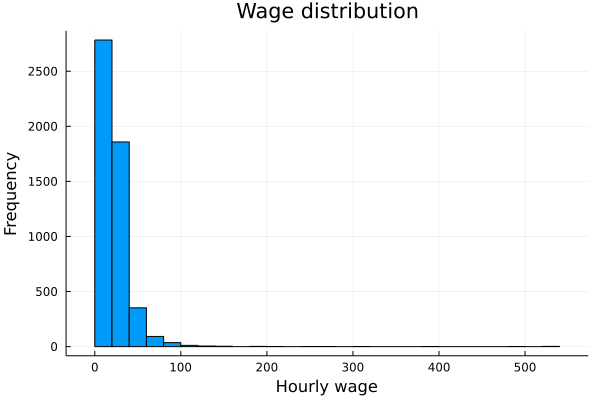

In [61]:
using Plots
plt = Plots.histogram( data["wage"], 
    title = "Wage distribution", 
    nbins = 30, 
    label = "")
xlabel!( "Hourly wage" )
ylabel!( "Frequency" )
display( plt )

In [76]:
using Random
Random.seed!(1234)

TaskLocalRNG()

In [77]:

training = sample( collect(1:1234), trunc(Int, 3 *1234/ 4 ),  replace= false )

data_train = data[ vec(training), : ]
data_test = data[ Not(training), : ]

LoadError: UndefVarError: sample not defined

In [68]:
basic_model <-  "sex + exp1 + shs + hsg + mw + so + we + occ2 + ind2"
flexible_model <- "sex + (exp1+ exp2+ exp3+ exp4+ shs + hsg + occ2+
ind2 + mw + so + we)**2"
formula_basic <- as.formula(paste("lwage", "~", basic_model))
formula_flex <- as.formula(paste("lwage", "~", flexible_model))
model_X_basic_train <- model.matrix(basic_model,data_train)
model_X_basic_test <- model.matrix(basic_model,data_test)
p_basic <- dim(model_X_basic_train)[2]
model_X_flex_train <- model.matrix(flexible_model,data_train)
model_X_flex_test <- model.matrix(flexible_model,data_test)
p_flex <- dim(model_X_flex_train)[2]

LoadError: MethodError: no method matching -(::String)
[0mClosest candidates are:
[0m  -(::Any, [91m::ChainRulesCore.AbstractThunk[39m) at C:\Users\JJTF\.julia\packages\ChainRulesCore\GUvJT\src\tangent_types\thunks.jl:31
[0m  -(::Any, [91m::PyCall.PyObject[39m) at C:\Users\JJTF\.julia\packages\PyCall\7a7w0\src\pyoperators.jl:14
[0m  -(::Any, [91m::ChainRulesCore.ZeroTangent[39m) at C:\Users\JJTF\.julia\packages\ChainRulesCore\GUvJT\src\tangent_arithmetic.jl:102
[0m  ...